In [1]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [2]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [3]:
import plotly.graph_objects as go

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pylab

In [5]:
%matplotlib notebook

In [6]:
import plotly.express as px

## The Complete DataFrame from Indicators.csv

In [7]:
indic = pd.read_csv('Indicators.csv')

## Making a list of Relevent Indicators

In [8]:
health = [
    "Life expectancy at birth, female (years)",
    "Mortality rate, adult, female (per 1,000 female adults)",
    "Population, female (% of total)",
    "Survival to age 65, female (% of cohort)",
    "Mortality rate, infant, female (per 1,000 live births)"
]

In [9]:
education = [
    "Gross enrolment ratio, primary, female (%)",
    "Gross enrolment ratio, secondary, female (%)",
    "Gross enrolment ratio, tertiary, female (%)",
    'Percentage of repeaters in primary education, all grades, female (%)',
    'Percentage of students in primary education who are female (%)',
    'Percentage of students in secondary education who are female (%)',
    'Percentage of students in secondary general education who are female (%)',
    'Percentage of students in secondary vocational education who are female (%)',
    'Teachers in secondary education, female (number)',
    'Gross intake ratio to Grade 1 of primary education, female (%)'
]

In [10]:
employment = [
    "Labor force participation rate, female (% of female population ages 15+) (national estimate)",
    "Unemployment, youth female (% of female labor force ages 15-24) (national estimate)",
    "Ratio of female to male labor force participation rate (%) (national estimate)",
    "Contributing family workers, female (% of females employed)",
    "Employment in agriculture, female (% of female employment)",
    "Employment in industry, female (% of female employment)",
    "Employment in services, female (% of female employment)",
    "Unemployment, female (% of female labor force) (national estimate)",
    "Wage and salaried workers, female (% of females employed)",
    "Part time employment, female (% of total female employment)",
    "Part time employment, female (% of total part time employment)",
    "Unemployment with primary education, female (% of female unemployment)",
    "Unemployment with secondary education, female (% of female unemployment)",
    "Unemployment with tertiary education, female (% of female unemployment)",
    "Employers, female (% of employment)",
    "Labor force with primary education, female (% of female labor force)",
    "Labor force with secondary education, female (% of female labor force)",
    "Labor force with tertiary education, female (% of female labor force)",
    "Vulnerable employment, female (% of female employment)",
    "Female legislators, senior officials and managers (% of total)",
    "Labor force participation rate, female (% of female population ages 15+) (modeled ILO estimate)",
    "Labor force participation rate, female (% of female population ages 15-64) (modeled ILO estimate)",
    "Labor force, female (% of total labor force)",
    "Ratio of female to male labor force participation rate (%) (modeled ILO estimate)",
    "Female headed households (% of households with a female head)",
    "Unemployment, female (% of female labor force)",
    "Unemployment, youth female (% of female labor force ages 15-24) (modeled ILO estimate)",
    "Children in employment, female (% of female children ages 7-14)",
    "Children in employment, study and work, female (% of female children in employment, ages 7-14)",
    "Children in employment, work only, female (% of female children in employment, ages 7-14)",
    "Net intake rate to Grade 1 of primary education, female (%)"
]

## EDA will be performed on the following countries:
    1. China
    2. United States
    3. India
    4. Japan
    5. Germany
    6. Indonesia
    7. United Kingdom
    8. France
    9. Italy
    10. Turkey
#### These countries have the highest GDP (based on CIA whitebook and IMF) among the countries present in this dataset.

In [11]:
# COI is abbriviation for Countries of Intrest
COI = [
    "China",
    "United States",
    "India",
    "Japan",
    "Germany",
    "Indonesia",
    "United Kingdom",
    "France",
    "Italy",
    "Turkey"
]

### Women's Health

In [12]:
dfh = indic.copy()
dfh.drop(['CountryCode',"IndicatorCode"],axis=1,inplace=True)
#dfh.drop(dfh[dfh.Year<2000].index, axis = 0, inplace = True)
dfh = dfh[dfh.CountryName.isin(COI)]
dfh=dfh[dfh.IndicatorName.isin(health)]
dfh.dropna(inplace=True)

In [13]:
dfh.groupby('IndicatorName').head()

,CountryName,IndicatorName,Year,Value
7224,China,"Life expectancy at birth, female (years)",1960,45.112000
7235,China,"Mortality rate, adult, female (per 1,000 femal...",1960,375.647200
7248,China,"Population, female (% of total)",1960,48.516384
7258,China,"Survival to age 65, female (% of cohort)",1960,34.792810
9662,France,"Life expectancy at birth, female (years)",1960,73.300000
9694,France,"Mortality rate, adult, female (per 1,000 femal...",1960,115.043000
9715,France,"Population, female (% of total)",1960,51.361038
9720,France,"Survival to age 65, female (% of cohort)",1960,80.212820
10037,Germany,"Life expectancy at birth, female (years)",1960,72.003000
10073,Germany,"Population, female (% of total)",1960,53.504558


In [14]:
import plotly.express as px

In [15]:
i=1
fig = px.line(dfh[(dfh.IndicatorName==health[i])].drop('IndicatorName',axis=1),x='Year',y='Value',color='CountryName',title = health[i])
fig.show()

In [16]:
dfh.head()

,CountryName,IndicatorName,Year,Value
7224,China,"Life expectancy at birth, female (years)",1960,45.112000
7235,China,"Mortality rate, adult, female (per 1,000 femal...",1960,375.647200
7248,China,"Population, female (% of total)",1960,48.516384
7258,China,"Survival to age 65, female (% of cohort)",1960,34.792810
9662,France,"Life expectancy at birth, female (years)",1960,73.300000


In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

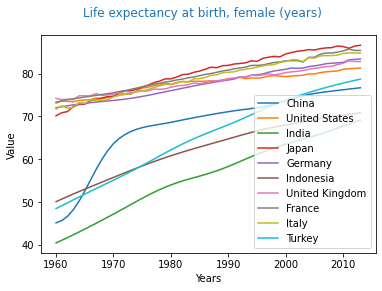

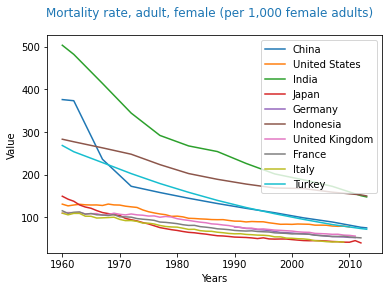

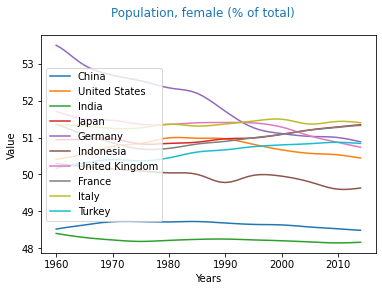

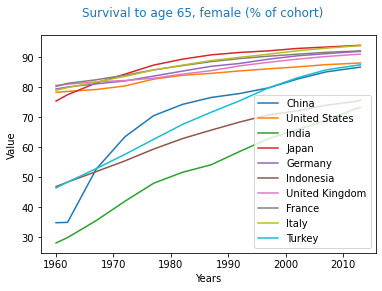

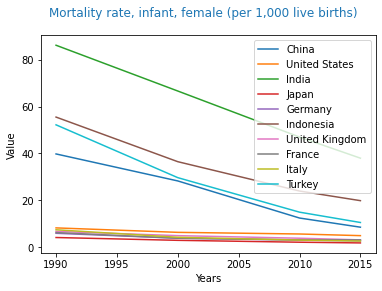

In [18]:
for i in range(len(health)):
    for country in COI:
        plt.suptitle(health[i], color='C0')
        plt.xlabel('Years')
        plt.ylabel("Value")
        plt.plot(dfh[(dfh.CountryName==country)&(dfh.IndicatorName==health[i])].Year,dfh[(dfh.CountryName==country)&(dfh.IndicatorName==health[i])].Value,label = country)
    plt.legend(loc='best')
    plt.show()

### Women's Education

In [19]:
dfe = indic.copy()
dfe.drop(['CountryCode',"IndicatorCode"],axis=1,inplace=True)
#dfh.drop(dfh[dfh.Year<2000].index, axis = 0, inplace = True)
dfe = dfe[dfe.CountryName.isin(COI)]
dfe=dfe[dfe.IndicatorName.isin(education)]
dfe.dropna(inplace=True)

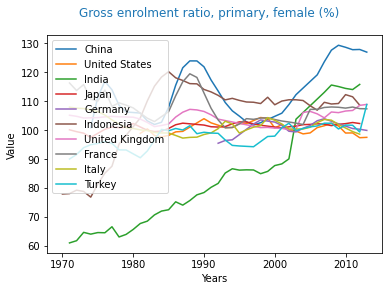

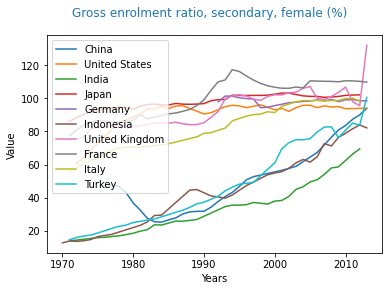

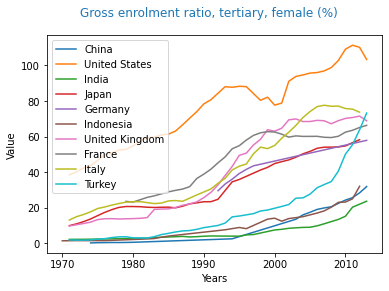

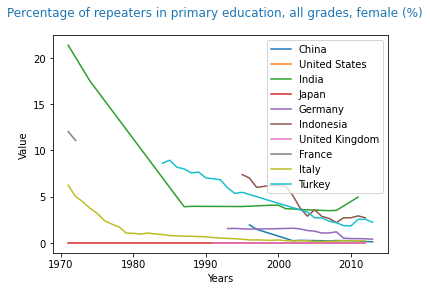

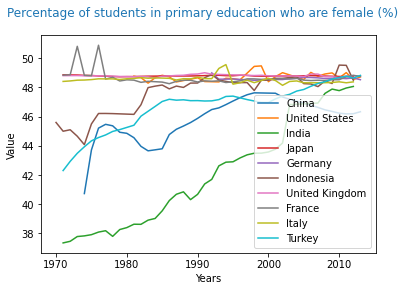

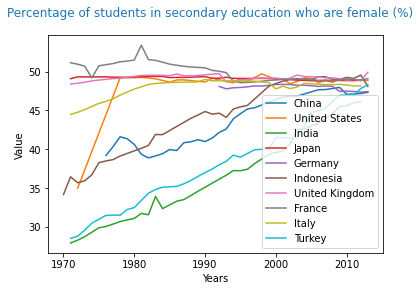

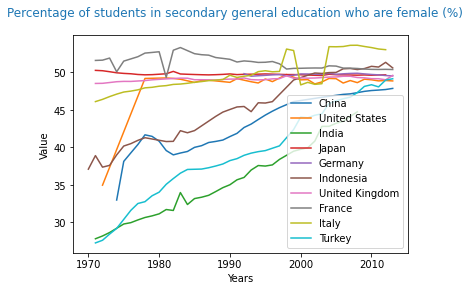

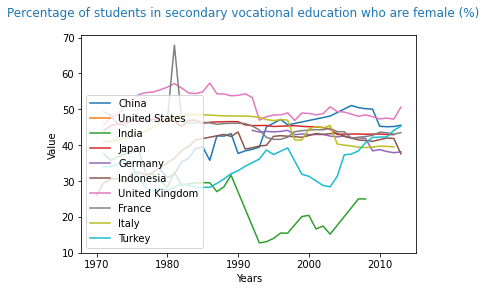

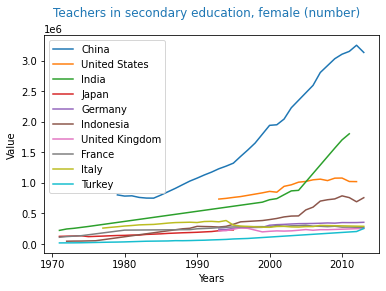

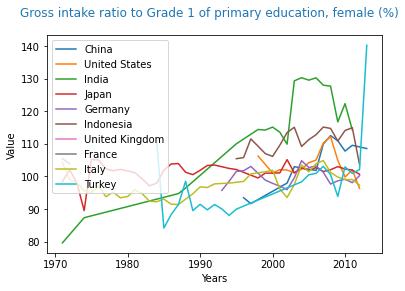

In [20]:
for i in range(len(education)):
    for country in COI:
        plt.suptitle(education[i], color='C0')
        plt.xlabel('Years')
        plt.ylabel("Value")
        plt.plot(dfe[(dfe.CountryName==country)&(dfe.IndicatorName==education[i])].Year,dfe[(dfe.CountryName==country)&(dfe.IndicatorName==education[i])].Value,label = country)
    plt.legend(loc='best')
    plt.show()

In [21]:
i=1
fig = px.line(dfe[(dfe.IndicatorName==education[i])].drop('IndicatorName',axis=1),x='Year',y='Value',color='CountryName',title = education[i])
fig.show()

In [22]:
import time

In [23]:
for i in range(len(education)):
    fig = px.line(dfe[(dfe.IndicatorName==education[i])].drop('IndicatorName',axis=1),x='Year',y='Value',color='CountryName',title = education[i])
    fig.show()

In [24]:
!pip install statsmodels

In [25]:
i=4
trend_fr =  px.scatter(dfe[(dfe.IndicatorName==education[i]) & (dfe.CountryName=='France')].drop('IndicatorName',axis=1),x='Year',y='Value',trendline='lowess', title = education[i])
trend_fr.show()

### Employment

In [26]:
dfem = indic.copy()
dfem.drop(['CountryCode',"IndicatorCode"],axis=1,inplace=True)
dfem = dfem[dfem.CountryName.isin(COI)]
dfem=dfem[dfem.IndicatorName.isin(employment)]
dfem.dropna(inplace=True)

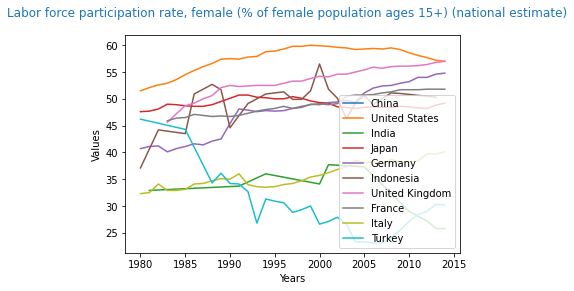

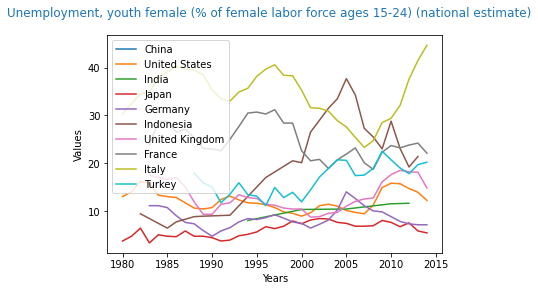

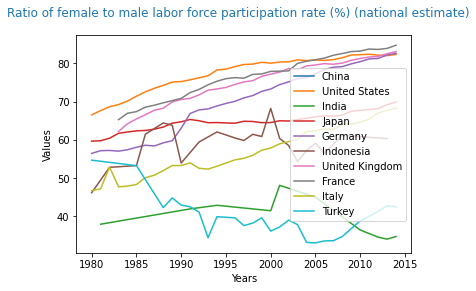

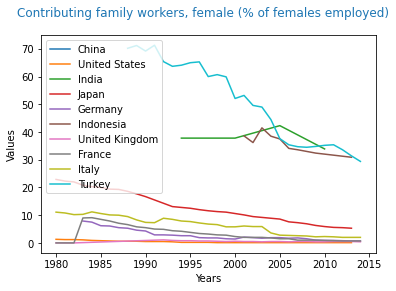

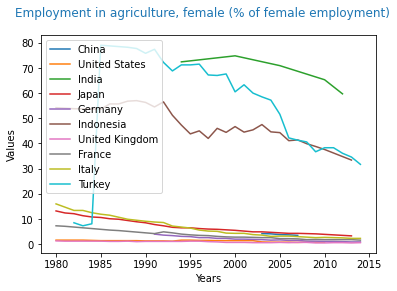

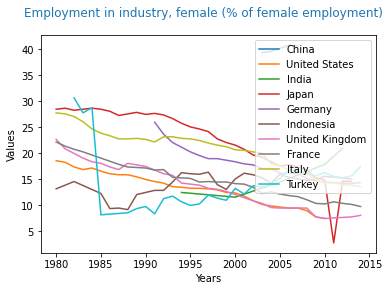

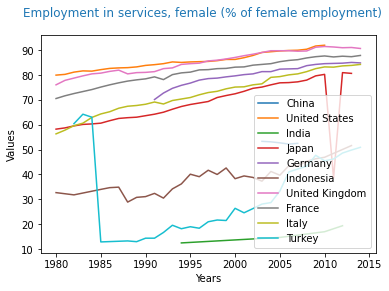

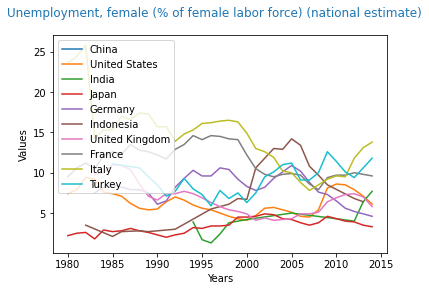

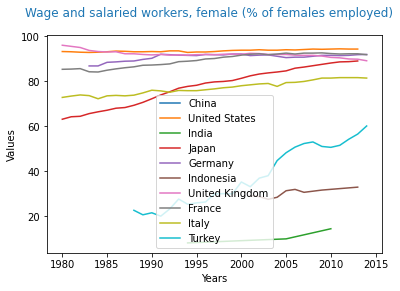

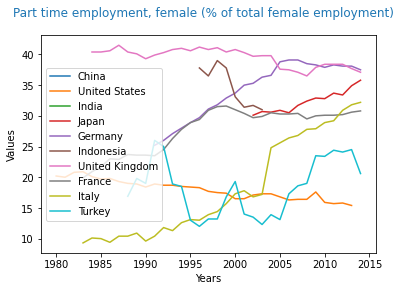

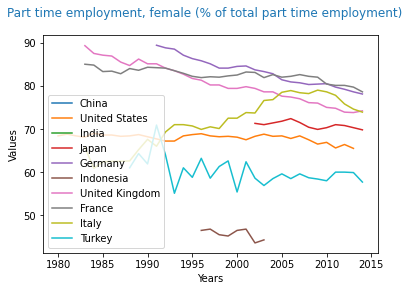

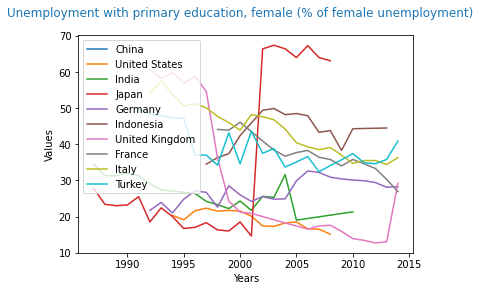

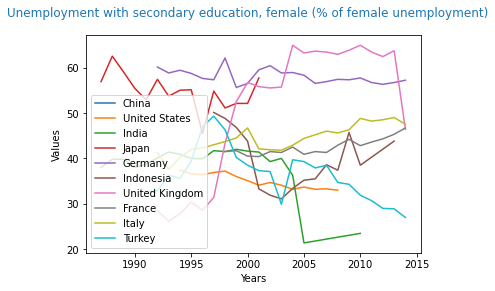

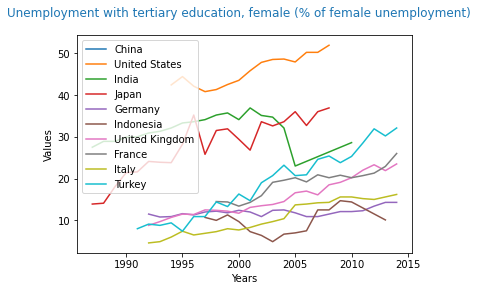

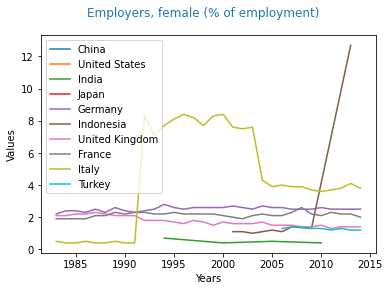

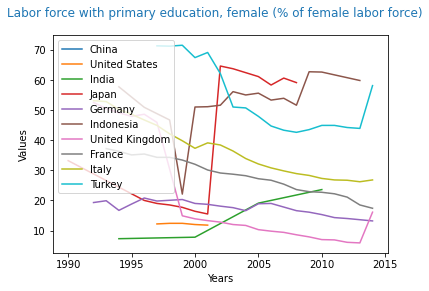

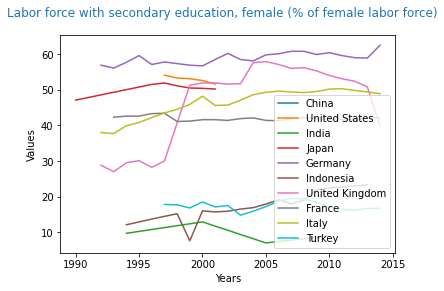

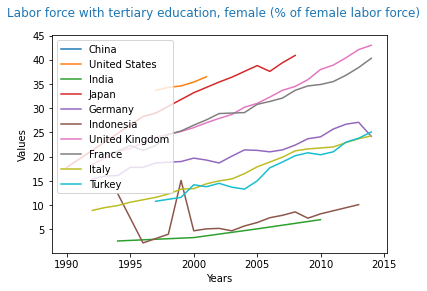

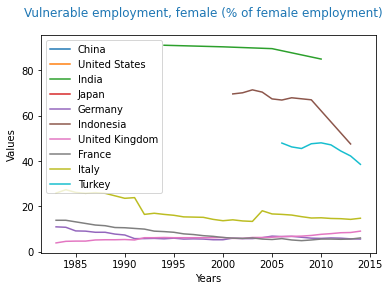

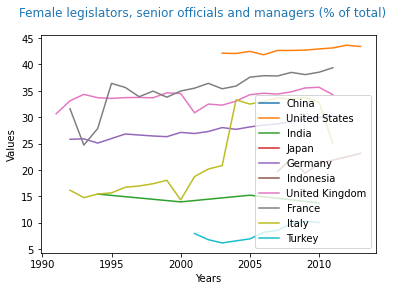

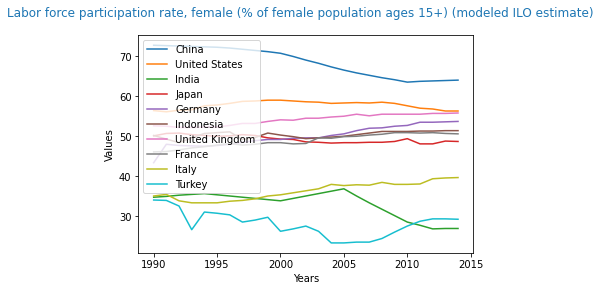

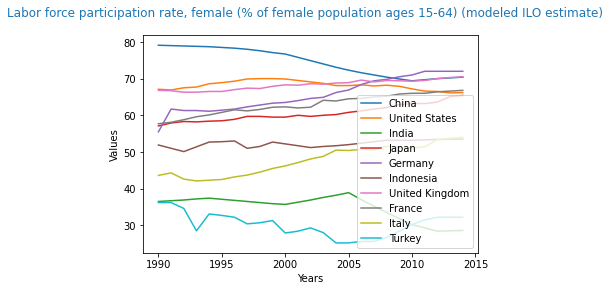

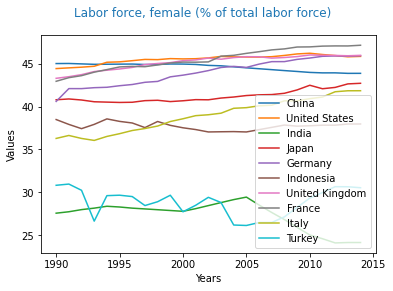

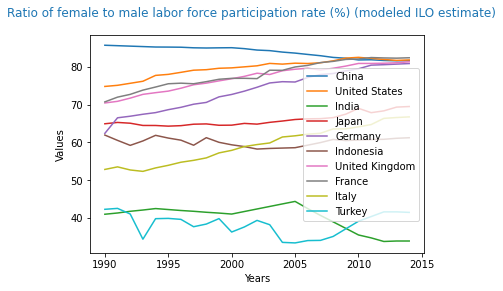

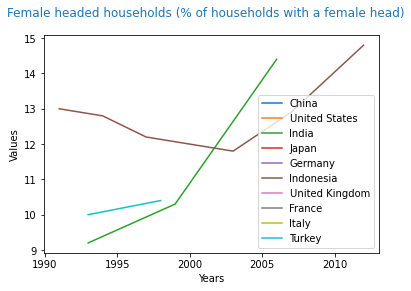

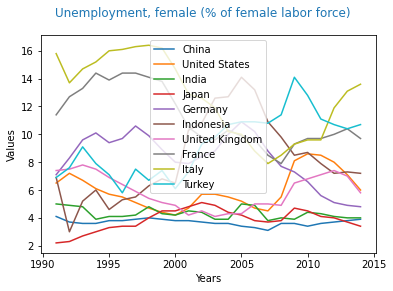

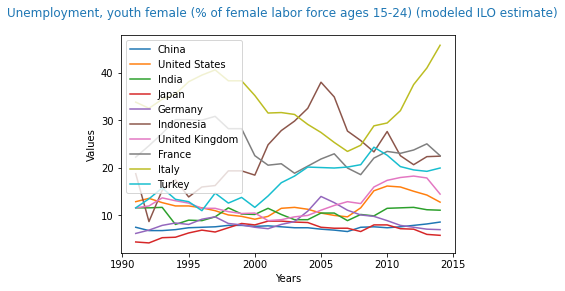

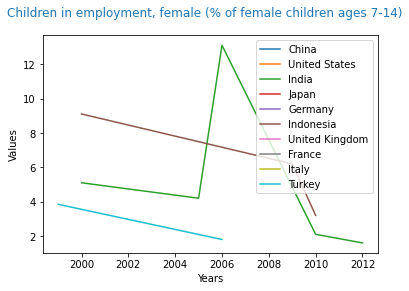

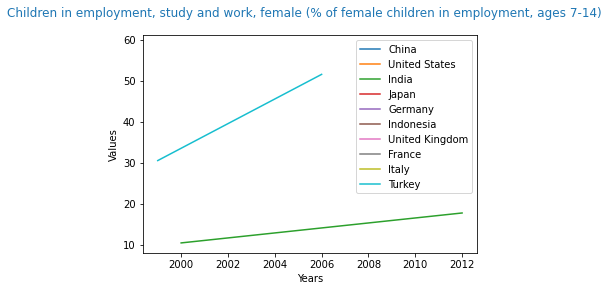

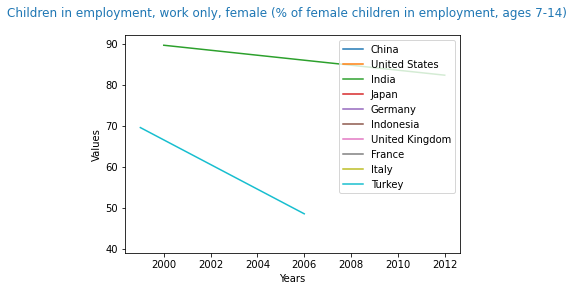

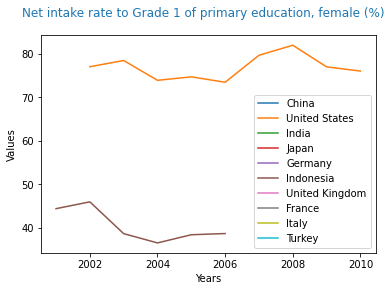

In [27]:
for i in range(len(employment)):
    for country in COI:
        plt.suptitle(employment[i], color='C0')
        plt.xlabel('Years')
        plt.ylabel("Values")
        plt.plot(dfem[(dfem.CountryName==country)&(dfem.IndicatorName==employment[i])].Year,dfem[(dfem.CountryName==country)&(dfem.IndicatorName==employment[i])].Value,label = country)
    plt.legend(loc='best')
    plt.show()

In [28]:
i=4
fig = px.scatter(dfem[(dfem.IndicatorName==employment[i])].drop('IndicatorName',axis=1),x='Year',y='Value',color='CountryName',title = employment[i],trendline='ols')
fig.show()

In [29]:
i=5
fig = px.scatter(dfem[(dfem.IndicatorName==employment[i])].drop('IndicatorName',axis=1),x='Year',y='Value',color='CountryName',title = employment[i],trendline='ols')
fig.show()

In [30]:
for i in range(len(employment)):
    fig = px.line(dfem[(dfem.IndicatorName==employment[i])].drop('IndicatorName',axis=1),x='Year',y='Value',color='CountryName',title = employment[i])
    fig.show()